# Data handling

In [1]:
import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import requests

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv (r"Final_Data.csv")
df

,Unnamed: 0,AQI,Temperature,Humidity,Wind,Pressure,City,State,Country
0,0,29.0,14,37,105,1015,Ashkasham,Badakhshan,Afghanistan
1,1,42.0,29,23,86,1005,BazareTashkan,Badakhshan,Afghanistan
2,2,42.0,22,26,52,1005,HafizMoghul,Badakhshan,Afghanistan
3,3,42.0,18,40,134,1013,KuranwaMunjan,Badakhshan,Afghanistan
4,4,42.0,31,21,85,1004,Mashhad,Badakhshan,Afghanistan
...,...,...,...,...,...,...,...,...,...
58628,58658,46.0,20,25,83,1019,Beitbridge,MatabelelandSouth,Zimbabwe
58629,58659,42.0,15,14,41,1021,Kwekwe,Midlands,Zimbabwe
58630,58660,53.0,15,21,78,1021,Plumtree,MatabelelandSouth,Zimbabwe
58631,58661,42.0,13,18,99,1022,Mvuma,Midlands,Zimbabwe


In [4]:
df.describe(include='all')

,Unnamed: 0,AQI,Temperature,Humidity,Wind,Pressure,City,State,Country
count,58633.000000,58589.000000,58633.000000,58633.000000,58633.000000,58633.000000,58633,58633,58633
unique,NaN,NaN,NaN,NaN,NaN,NaN,51795,1958,186
top,NaN,NaN,NaN,NaN,NaN,NaN,Clinton,Bavaria,USA
freq,NaN,NaN,NaN,NaN,NaN,NaN,24,1756,16721
mean,29328.624716,36.504344,22.874320,65.406358,88.983712,1012.592806,NaN,NaN,NaN
std,16934.771998,28.588833,5.602679,20.040864,68.010007,7.231725,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,1.000000,0.000000,507.000000,NaN,NaN,NaN
25%,14661.000000,17.000000,20.000000,52.000000,36.000000,1010.000000,NaN,NaN,NaN
50%,29325.000000,29.000000,23.000000,66.000000,74.000000,1013.000000,NaN,NaN,NaN
75%,43994.000000,46.000000,26.000000,82.000000,124.000000,1016.000000,NaN,NaN,NaN


handle outliers

Text(0, 0.5, 'Frequency')

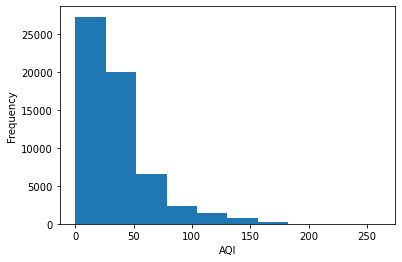

In [77]:
plt.hist(df.AQI,bins=10)
plt.xlabel("AQI")
plt.ylabel("Frequency")

In [ ]:
sum(df.AQI>250)

<AxesSubplot:xlabel='AQI'>

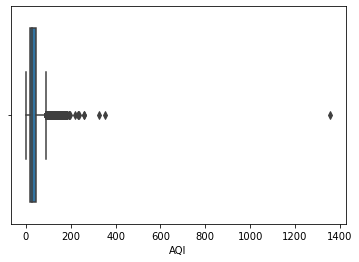

In [6]:
sns.boxplot(df.AQI)

In [7]:
sum(df.AQI>300)


3

In [8]:
df.AQI[df.AQI>300]=np.nan  

after handling AQI outliers:

In [9]:
sum(df.AQI>300)

0

<AxesSubplot:xlabel='AQI'>

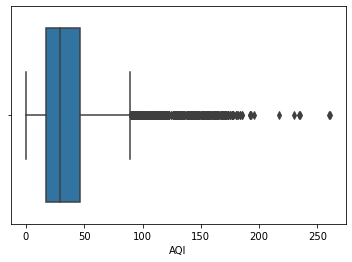

In [10]:
sns.boxplot(df.AQI)

fuction to clear outliers per col:

In [11]:
def outlier_iqr(df,col):
    Q1=np.percentile(df[col],25)
    Q3=np.percentile(df[col],75)
    IQR=Q3-Q1
    print(Q1,Q3,IQR)
    IQR_range=1.5*IQR
    row_outlier=df[(df[col]<Q1-IQR_range)|(df[col]>Q3+IQR_range)].index   
    for i in row_outlier:
        df.loc[i,col]=np.nan
    return df

In [12]:
df.Humidity.describe()

count    58633.000000
mean        65.406358
std         20.040864
min          1.000000
25%         52.000000
50%         66.000000
75%         82.000000
max        100.000000
Name: Humidity, dtype: float64

In [13]:
outlier_iqr(df,'Humidity')
df.Humidity.describe()

52.0 82.0 30.0


count    58563.000000
mean        65.479808
std         19.939715
min          7.000000
25%         52.000000
50%         66.000000
75%         82.000000
max        100.000000
Name: Humidity, dtype: float64

In [14]:
df.Wind.describe()

count    58633.000000
mean        88.983712
std         68.010007
min          0.000000
25%         36.000000
50%         74.000000
75%        124.000000
max        901.000000
Name: Wind, dtype: float64

In [15]:
outlier_iqr(df,'Wind')
df.Wind.describe()

36.0 124.0 88.0


count    57107.000000
mean        83.254627
std         58.460934
min          0.000000
25%         35.000000
50%         74.000000
75%        116.000000
max        256.000000
Name: Wind, dtype: float64

In [16]:
df.Pressure.describe()

count    58633.000000
mean      1012.592806
std          7.231725
min        507.000000
25%       1010.000000
50%       1013.000000
75%       1016.000000
max       1059.000000
Name: Pressure, dtype: float64

In [17]:
outlier_iqr(df,'Pressure')
df.Pressure.describe()

1010.0 1016.0 6.0


count    56536.000000
mean      1012.961423
std          4.313731
min       1001.000000
25%       1011.000000
50%       1013.000000
75%       1016.000000
max       1025.000000
Name: Pressure, dtype: float64

handling Temperature outliers: 

In [18]:
df.Temperature.describe()

count    58633.000000
mean        22.874320
std          5.602679
min          0.000000
25%         20.000000
50%         23.000000
75%         26.000000
max         54.000000
Name: Temperature, dtype: float64

In [19]:
Q1=np.percentile(df['Temperature'],25)
Q3=np.percentile(df['Temperature'],75)
IQR=Q3-Q1

In [20]:
print(Q1)
print(Q3)
print(IQR)

20.0
26.0
6.0


In [21]:
Temperature_outlier_rows = df[(df["Temperature"] < Q1 - 1.5*IQR) | (df["Temperature"] > Q3 + 1.5*IQR )].index

In [22]:
len(Temperature_outlier_rows)

2484

In [23]:
df.Temperature[Temperature_outlier_rows] = np.nan

In [24]:
df.Temperature.describe()

count    56149.000000
mean        23.242284
std          4.555281
min         11.000000
25%         21.000000
50%         23.000000
75%         26.000000
max         35.000000
Name: Temperature, dtype: float64

Relationships between variables:

In [25]:
def get_highly_correlated_cols(df):
    correlations=list()
    tuple_arr=list()
    for count1, i in enumerate(df.columns, start=0):
        for count2, j in enumerate(df.columns, start=0):
            if (count1<count2):
                R1 = np.corrcoef(df[i],df[j])
                if (R1[1][0]>=0.5):
                    correlations.append(R1[1][0])
                    my_tapple=(count1,count2)
                    tuple_arr.append(my_tapple)
                    
    return correlations, tuple_arr

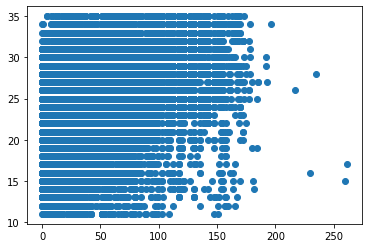

In [26]:
plt.scatter(df.AQI, df.Temperature)

<AxesSubplot:xlabel='AQI', ylabel='Density'>

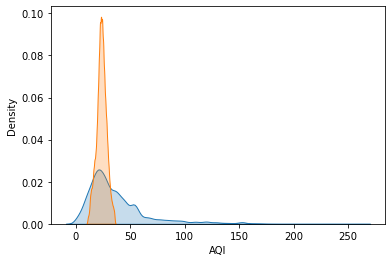

In [47]:
ax = sns.kdeplot(df.AQI, shade=True)
sns.kdeplot(df.Temperature, shade=True)

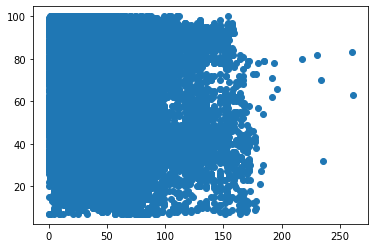

In [27]:
plt.scatter(df.AQI, df.Humidity)

<AxesSubplot:xlabel='AQI', ylabel='Density'>

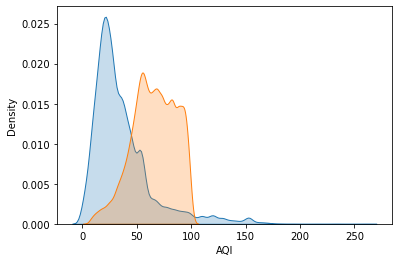

In [48]:
ax = sns.kdeplot(df.AQI, shade=True)
sns.kdeplot(df.Humidity, shade=True)

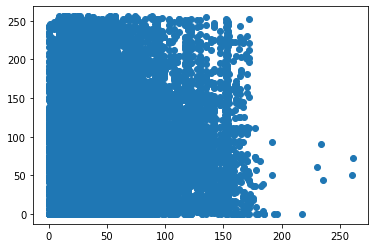

In [28]:
plt.scatter(df.AQI, df.Wind)

<AxesSubplot:xlabel='AQI', ylabel='Density'>

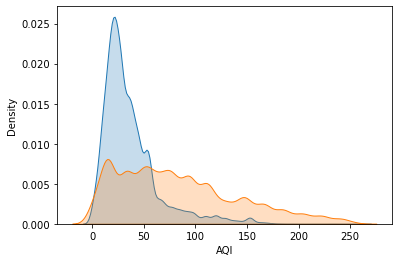

In [49]:
ax = sns.kdeplot(df.AQI, shade=True)
sns.kdeplot( df.Wind, shade=True)

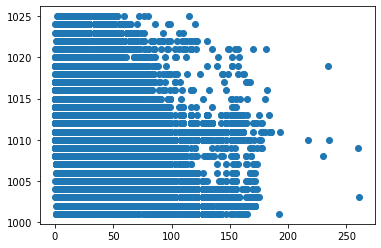

In [29]:
plt.scatter(df.AQI, df.Pressure)

<AxesSubplot:xlabel='AQI', ylabel='Density'>

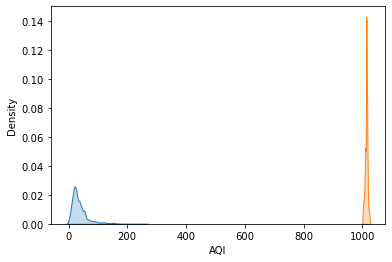

In [50]:
ax = sns.kdeplot(df.AQI, shade=True)
sns.kdeplot(df.Pressure, shade=True)

Cut AQI levels, and how many there are in each level:

In [30]:
pd.cut(df["AQI"],bins=6).value_counts()

(-0.261, 43.5]    42914
(43.5, 87.0]      11932
(87.0, 130.5]      2783
(130.5, 174.0]      928
(174.0, 217.5]       24
(217.5, 261.0]        5
Name: AQI, dtype: int64

(array([4.2914e+04, 1.1818e+04, 2.8970e+03, 9.2800e+02, 2.4000e+01,
        5.0000e+00]),
 array([  0. ,  43.5,  87. , 130.5, 174. , 217.5, 261. ]),
 <BarContainer object of 6 artists>)

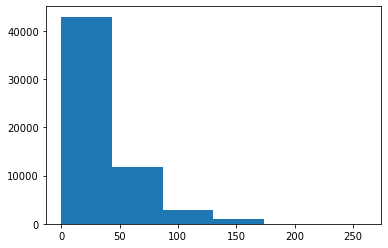

In [31]:
plt.hist(df["AQI"],bins=6)

probability to "Good" AQI:

In [32]:
count_good=df.AQI[df.AQI<50].count()
prob_good=count_good/ df.AQI.count()
prob_good

0.7811763902638855

probability to "Unhealthy" AQI:

In [33]:
count_unhealty=df.AQI[df.AQI<150].count()-df.AQI[df.AQI<50].count()
prob_unhealty=count_unhealty/df.AQI.count()
prob_unhealty


0.2091967364216707

In [34]:
d={'AQI':[0,1], 'frequency':[count_good,count_unhealty],'(p)':[prob_good,prob_unhealty]}
df_aqi=pd.DataFrame(data=d)
df_aqi

,AQI,frequency,(p)
0,0,45766,0.781176
1,1,12256,0.209197


<AxesSubplot:ylabel='frequency'>

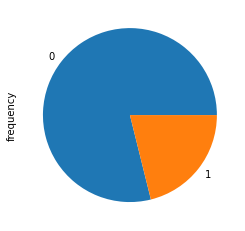

In [35]:
df_aqi['frequency'].plot(kind='pie')

<AxesSubplot:ylabel='(p)'>

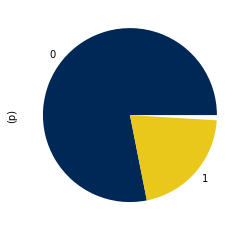

In [36]:
mycolors = ['#002856', '#EAC71B']
df_aqi['(p)'].plot(kind='pie', colors = mycolors)

Add a column (0,1) if the AQI is OK.(1- not ok, 0-ok)

In [53]:
IS_OK=list()
for row in df["AQI"]:
    if(row>150):
        IS_OK.append(1)
    else:
        IS_OK.append(0)
df['Is_AQI_OK']=IS_OK
df

,Unnamed: 0,AQI,Temperature,Humidity,Wind,Pressure,City,State,Country,Is_AQI_OK
0,0,29.0,14.0,37.0,105.0,1015.0,Ashkasham,Badakhshan,Afghanistan,0
1,1,42.0,29.0,23.0,86.0,1005.0,BazareTashkan,Badakhshan,Afghanistan,0
2,2,42.0,22.0,26.0,52.0,1005.0,HafizMoghul,Badakhshan,Afghanistan,0
3,3,42.0,18.0,40.0,134.0,1013.0,KuranwaMunjan,Badakhshan,Afghanistan,0
4,4,42.0,31.0,21.0,85.0,1004.0,Mashhad,Badakhshan,Afghanistan,0
...,...,...,...,...,...,...,...,...,...,...
58628,58658,46.0,20.0,25.0,83.0,1019.0,Beitbridge,MatabelelandSouth,Zimbabwe,0
58629,58659,42.0,15.0,14.0,41.0,1021.0,Kwekwe,Midlands,Zimbabwe,0
58630,58660,53.0,15.0,21.0,78.0,1021.0,Plumtree,MatabelelandSouth,Zimbabwe,0
58631,58661,42.0,13.0,18.0,99.0,1022.0,Mvuma,Midlands,Zimbabwe,0


In [54]:
df['Is_AQI_OK'].value_counts(normalize=True)

0    0.990381
1    0.009619
Name: Is_AQI_OK, dtype: float64

<AxesSubplot:ylabel='Is_AQI_OK'>

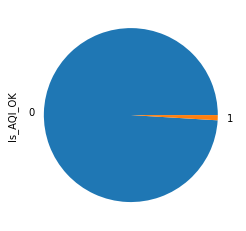

In [55]:
df['Is_AQI_OK'].value_counts().plot(kind='pie')

<AxesSubplot:>

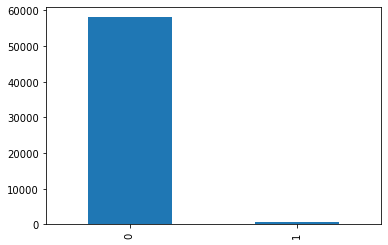

In [56]:
df['Is_AQI_OK'].value_counts().plot(kind='bar')

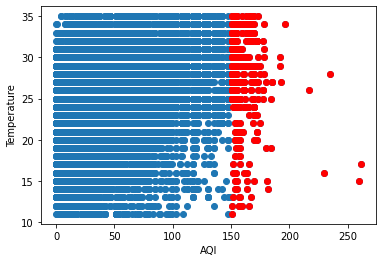

In [58]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df.AQI, df.Temperature) 
plt.xlabel('AQI')
plt.ylabel('Temperature')
ax.scatter(df.AQI[df.Is_AQI_OK==1], df.Temperature[df.Is_AQI_OK==1], c='red') #drawing only Is_AQI_OK in red
plt.show()

In [59]:
df[['AQI', 'Temperature', 'Humidity']].corr()

,AQI,Temperature,Humidity
AQI,1.000000,0.329440,-0.116333
Temperature,0.329440,1.000000,-0.461612
Humidity,-0.116333,-0.461612,1.000000


In [64]:
df.groupby('Temperature').AQI.mean()

Temperature
11.0    32.565000
12.0    26.875458
13.0    22.648366
14.0    22.458511
15.0    24.326923
16.0    21.424983
17.0    24.550118
18.0    26.431659
19.0    29.849388
20.0    31.876295
21.0    33.025594
22.0    32.555556
23.0    32.090809
24.0    34.439524
25.0    37.049406
26.0    37.753970
27.0    42.331480
28.0    46.045355
29.0    52.376655
30.0    50.661376
31.0    58.391137
32.0    53.125995
33.0    60.391916
34.0    83.368192
35.0    81.753463
Name: AQI, dtype: float64

Text(0, 0.5, 'Mean Temperature')

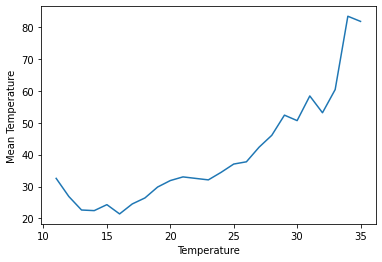

In [66]:
df.groupby('Temperature').AQI.mean().plot(kind='line')
plt.ylabel('Mean Temperature')

<AxesSubplot:xlabel='AQI'>

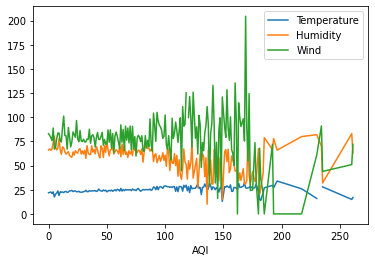

In [68]:
aqi=df.groupby(['AQI']).mean()[['Temperature','Humidity','Wind']]
aqi.plot()

<AxesSubplot:>

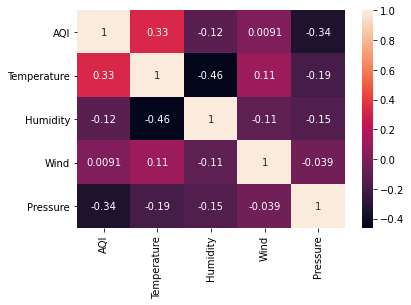

In [79]:
df2=pd.DataFrame(df,columns =['AQI','Temperature','Humidity','Wind','Pressure'])
sns.heatmap(df2.corr(), annot=True)

<AxesSubplot:>

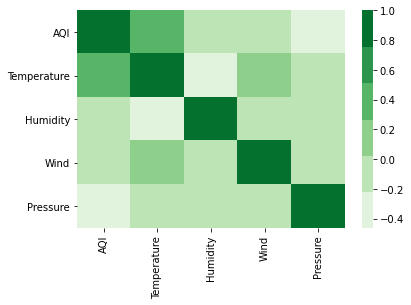

In [80]:
colormap = sns.color_palette("Greens") #creating a colormap of green shades
sns.heatmap(df2.corr(), cmap=colormap) #using the created colormap

<AxesSubplot:>

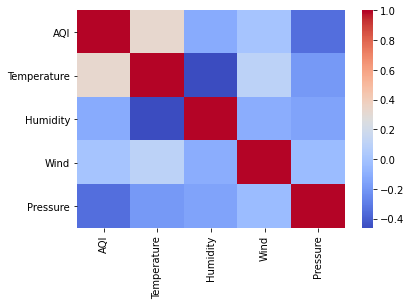

In [81]:
sns.heatmap(df2.corr(), cmap='coolwarm') 

In [71]:
ct1=pd.crosstab(df["Temperature"],df['Is_AQI_OK'] )
ct1

Is_AQI_OK,0,1
Temperature,,
11.0,199,1
12.0,269,5
13.0,761,4
14.0,936,4
15.0,983,7
16.0,1430,6
17.0,1696,4
18.0,1853,3
19.0,2447,5


In [72]:
ct2=pd.crosstab(df["Temperature"],df['Is_AQI_OK'] , normalize='index')
ct2

Is_AQI_OK,0,1
Temperature,,
11.0,0.995000,0.005000
12.0,0.981752,0.018248
13.0,0.994771,0.005229
14.0,0.995745,0.004255
15.0,0.992929,0.007071
16.0,0.995822,0.004178
17.0,0.997647,0.002353
18.0,0.998384,0.001616
19.0,0.997961,0.002039


Text(0, 0.5, 'Temperature')

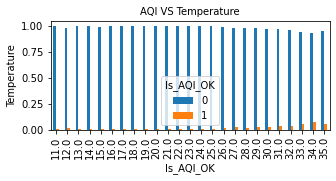

In [74]:
ct2.plot(kind='bar', figsize=(5,2))

plt.title('AQI VS Temperature', fontsize=10)
plt.xlabel('Is_AQI_OK')
plt.ylabel('Temperature')

In [75]:
from scipy.stats import chi2_contingency

In [76]:
chi2_contingency(ct1)

(924.5586326244767,
 9.07554839774261e-180,
 24,
 array([[1.98222586e+02, 1.77741367e+00],
        [2.71564943e+02, 2.43505672e+00],
        [7.58201393e+02, 6.79860728e+00],
        [9.31646156e+02, 8.35384424e+00],
        [9.81201802e+02, 8.79819765e+00],
        [1.42323817e+03, 1.27618301e+01],
        [1.68489198e+03, 1.51080162e+01],
        [1.83950560e+03, 1.64943988e+01],
        [2.43020891e+03, 2.17910916e+01],
        [3.35095282e+03, 3.00471780e+01],
        [4.29845678e+03, 3.85432154e+01],
        [5.34606315e+03, 4.79368466e+01],
        [5.42931664e+03, 4.86833603e+01],
        [5.41940551e+03, 4.85944897e+01],
        [4.75734207e+03, 4.26579280e+01],
        [3.93471834e+03, 3.52816613e+01],
        [3.21021479e+03, 2.87852143e+01],
        [2.71168498e+03, 2.43150190e+01],
        [2.02187038e+03, 1.81296194e+01],
        [1.49856275e+03, 1.34372473e+01],
        [1.02877522e+03, 9.22477693e+00],
        [7.47299150e+02, 6.70084953e+00],
        [5.63943258e+02, 5.